In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
import matplotlib.image as pltimg

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import recall_score, precision_score

from sklearn.metrics import roc_curve, roc_auc_score

## 나이브 베이즈 분석
* 조건부확률이 이용한 확률 기반 머신러닝 분류 알고리즘   
* 주사위를 굴려 짝수눈이 나올 확률P은? 
    + 어떤 사건의 확률P = 원하는 결과수 / 가능한 결과수
    + 모든 실험의 결과가 동일한 가능성을 가진다고 가정함
    + 이를 **고전적확률**이라 함
    + 상호배타적, 덧셈법칙, 여의법칙,덧셈의 일반법칙,곱셈법칙(독립사건),조건부확률
* 동전을 100회 던졌을때 앞면이 나오는 횟수는?
    + 전통적 확률에서는 **일어난횟수/전체시도횟수**로 계산
    + 이를 **경험적확률**이라 함 - 일정한 확률로 반복시행
    + 시행횟수가 충분히 했을때 어떤 사건이 일어나는 상대적 횟수는 일정한 패턴을 보인다는 의미
    + 대수의 법칙    
* 만일, A 라는 도시에 수지가 태어난 경우, 이 아이가 노벨상을 받을 확률은 얼마나 될까?
    + 이것을 경험적 확률로 계산하려면 
    + 이 아이를 여러 명 살게하고 그 중 몇명이 노벨상을 받는지 평가해보면 됨
    + 문제는 동일한 유전자, 환경에 자란 아이를 만들수 있는가 임
* 이러한 상황에서는 **베이즈 확률론**을 이용한다
    + 활용 가능한 정보에 기초해서 어떤 개인이 결정한 특정 사건이 발생할 가능성(확률) 
    + 일어나지 않은일에 대한 확률을 불확실성이라는 개념으로 이야기 함
    + 즉, 이 사건과 관련된 여러가지 확률을 이용해서 새롭게 일어날 수 있는 사건에 대해 추정하는 것
    + 이를 **주관적확률**이라 함
    + 베이즈 정리, 사전확률, 사후확률 - 나이브 베이즈

## 중요 확률 개념
* 조건부 확률
    + 어떤 사건 B가 일어났을 때 사건 A가 일어날 확률을 의미
    + $ P(A|B) = \frac {P(A \cap B)} {P(B)} $
* 확률의 곱셈법칙
    + 두 가지 이상의 사건이 동시에 발생하는 확률
    + 사건 A,B가 동시에 일어날 확률은 사건 A 발생 확률과 사건 B 발생 확률을 곱한 것과 같음
    + $ P(A ∩ B) = P(A|B)P(B) = P(B|A)P(A) $
* 전체 확률의 법칙
    + 나중에 주어지는 사건 X의 확률은 그 사건의 원인을 여러가지로 나누어서,
    + 각 원인에 대한 조건부 확률 P(X|Y)과 그 원인이 되는 확률 P(Y)의 곱에 의한
    + 가중합으로 구할 수 있음을 말함
    + $ P(A) = P(A ∩ B_1) + P(A ∩ B_2) + ... $

## 베이즈 이론
* 18세기 영국 장로교 목사였던 토마스 베이즈는 신이 실제로 존재하는가에 대한 문제로 고심
    + 수학에 관심이 있었기 때문에 지구상의 모든 증거를 이용해서 신이 존재할 확률을 계산하는 공식을 개발하려 함
    + 후에 베이즈의 업적을 정리해서 나온 결과물
* 이전의 경험과 현재의 증거를 토대로 어떤 사건의 확률을 추론
* 확률 $P(A|B)$를 알고 있을 때, 관계가 정반대인 확률 $P(B|A)$를 계산
* $ P(A|B) = P(A) \cdot \frac {P(B|A)} {P(B)} $
    + $P(A)$ : $A$의 사전확률 - 현재의 증거
    + $P(B)$ : $B$의 사전확률 - 과거의 경험
    + $P(A|B)$ : 사건 $B$가 주어졌을때 $A$의 조건부 확률
        - 알려진 결과에 기초한 어떤 가설에 대한 가능성
    + $P(B|A)$ : 사건 $A$라는 증거에 대한 사후 확률
        - 사건 $A$가 일어났다는 것을 알고 그것이 사건 $B$로 부터 일어난 것이라고 생각되는 조건부 확률
* $ P(A|B) = \frac {P(B \cap A)} {P(B)} = \frac {P(B|A)P(A)} {P(B)} =  
             \frac {P(B|A)P(A)} {P(A ∩ B) + P(\sim A ∩ B)}  $

## 베이즈 정리
* experience base prediction
* 이전의 경험과 현재의 증거를 토대로 어떤 사건의 확률을 추론하는 알고리즘
* 따라서, 사건이 일어날 확률을 토대로 의사결정을 하는 경우, 그와 관련된 사전정보를 얼마나
알고 있나에 따라 크게 좌우
* 기하학 : 피타고라스 정리 = 확률학 : 베이즈 정리

## 베이즈 정리에 대한 예제
* 삼키기 어려울 정도의 목에 통증 유발 - 인후염
* 병원 방문후 검사(정확도 90%) 시행 
    + 결과 : 양성(폐암)
* 의사 : 이 결과로 폐암일 확률은 10%도 안될 수 있음
    + 폐암에 걸린 남성은 성인 남성 1% 정도
* 환자 : 그래도 걱정이 되니 추가 검사 시행 - 음성(!)
* 베이즈 정리에 근거, 실제 검사에서 양성이 나왔을때 진짜 폐암에 걸릴 확률은 ???


* 베이즈 정리 : P(A|B) = P(A)P(B|A)/P(B)
* 조건부확률 : P(A ∩ B) = P(A)P(B|A) = P(B)P(A|B)
 + 따라서, P(A|B) = P(A ∩ B)/P(B)로 도출가능
 + 결론적으로 P(A|B) = P(B)P(A|B)/P(B)로도 사용가능
* 양성일때 폐암일 확률 = 
 + P(폐암|양성) = P(폐암∩양성) / P(양성) = P(폐암)P(양성|폐암) / P(양성)
* 폐암일때 양성일 확률 
 + P(양성|폐암) = P(양성∩폐암) / P(폐암) = P(양성)P(폐암|양성) / P(폐암)


* 정확도 90% 검사로, 양성일때 폐암일 확률은? P(폐암|양성) = 0.9
* 성인 남성이 폐암에 걸릴 확률은? P(폐암) = 0.01
* 양성일 확률은? P(양성)
     + 베이즈 정리와 전체 확률의 법칙을 이용
     + **폐암이고, 검사로도 진짜 양성**일 확률과
     + **폐암이 아닌데, 검사로 양성**일 확률을 더한 확률
     + P(양성|폐암)P(폐암) + P(양성|1-폐암)P(1-폐암)
     + = 0.9  0.01 + 0.1  0.99 = 0.10791 = 0.108 = 11%
     + 따라서, P(폐암|양성) = P(폐암)P(양성|폐암) / P(양성) 
     + = (0.01 * 0.9) / 0.108 = 0.083 = 8.3% (별거아님)
    
* 시간이 지나 다시 목이 아프고 숨을 쉬기 어려워서 다시 병원에 감
* 다시 검사(정확도99%) 해보니 역시 양성
     + 예전 경험에 비춰 별거 아니라고 생각
* 의사는 폐암에 걸릴 확률이 50%로 증가
    + 절대 심각할 수 있다고 경고
    + P(양성|폐암)P(폐암) + P(양성|1-폐암)P(1-폐암)
    + = (0.99 * 0.01) + (0.01 * 0.99) = 0.0197
    + 따라서, P(폐암|양성) = P(폐암)P(양성|폐암) / P(양성) 
    + = (0.01 * 0.99) / 0.0197 = 0.503 = 50% (심각함)

## 나이브베이즈 예제
* 나이브 베이즈에서 '나이브naive'는 단순한 이란 뜻으로 모든 변수가 서로 독립이라고 가정하고 확률을 계산함
* 사후확률값 자체를 아는 것이 중요한 것이 아니고 각각의 사후확률의 크기를 비교하는 것 만으로도 충분하기 때문에 **수식의 분모는 상수처럼 취급**함
* 각 변수의 상호작용을 고려해서 확률을 구하려면 수식이 상당히 복잡해짐
* 각 변수를 독립사건처럼 단순화함으로써 **수식이 단순해지는 효과**를 얻을 수 있음

### 집 없고 결혼했고 회사경력 3년인 밥은 연체할 것인가?
<img src='img/loan.png' width='50%'>

In [1]:
# 집 없고 결혼했고 회사경력 3년
# P(A|B) = P(A)P(B|A) / P(B)
#        = P(연체|집,결혼,경력)
#        = P(연체|집) * P(연체|결혼) * P(연체|경력)
#        = P(연체)P(집|연체) / P(집) * P(연체)P(결혼|연체) / P(결혼) * P(연체)P(경력|연체) / P(경력)
#        = P(연체)P(집|연체) * P(연체)P(결혼|연체) * P(연체)P(경력|연체)         

### 밥이 연체할 확률
+ P(A|B) = P(A)P(B|A) / P(B) =  P(A)P(B|A)
+ P(B) = 집, 결혼, 경력
+ P(A) = 연체 여부

### 밥이 연체 안할 확률

In [ ]:
# P(A) = P(Yes) = 3/10
# P(B) = P(집, 결혼, 경력) = P(집)*P(결혼)*P(경력)
# P(집) = P(집없음|Yes) = 2/3
# P(결혼) = P(결혼함|Yes) = 1/3
# P(경력) = P(경력=3|Yes) = 1/3
# 따라서, P(연체Y|집N,결혼Y,경력3) = P(A) * P(B) = 3/10 * 2/3 * 1/3 * 1/3 = 0.022

In [ ]:
# P(A) = P(No) = 7/10
# P(B) = P(집, 결혼, 경력) = P(집)*P(결혼)*P(경력)
# P(집) = P(집없음|No) = 4/7
# P(결혼) = P(결혼함|No) = 4/7
# P(경력) = P(경력=3|No) = 2/7
# 따라서, P(연체N|집N,결혼Y,경력3) = P(A) * P(B) = 7/10 * 4/7 * 4/7 * 2/7 = 0.065

In [ ]:
# 따라서, 밥은 연체하지 않을 가능성이 높음(Y:0.22 vs N : 0.065)

## 영화마케팅 문제를 나이즈베이즈로 분석
* 영화관객의 성향을 설문조사로 정리
* 관객의 속성으로 영화취향을 파악해 봄
* sklearn에서 구현된 나이브베이즈 알고리즘은 3가지
    + GaussianNB      : 연속형 데이터
    + BernoulliNB     : 이진 데이터, 예/아니오
    + MultinomialNB   : 텍스트 데이터, 다항

In [7]:
# P(B) = 20대, 여, IT, 미혼, 애인없음 
# P(A) = 장르에 따른 선택 확률

In [9]:
import pandas as pd
import numpy as np

In [20]:
movie = pd.read_csv('data/movie.csv', encoding='euc-kr')
movie.head()

,나이,성별,직업,결혼여부,이성친구,장르
0,20대,여,디자이너,NO,YES,로맨틱
1,40대,남,홍보/마케팅,NO,NO,공포
2,10대,여,홍보/마케팅,NO,YES,로맨틱
3,20대,여,디자이너,YES,NO,로맨틱
4,10대,남,학생,NO,NO,액션


In [22]:
# 컬럼명 변경, 레이블인코딩 적용
cols = ['나이','성별','직업','결혼여부','이성친구','장르']
ncols = ['ages',' gender','job','married','lover','genre']

for c in cols:
    movie[c] = pd.Categorical(movie[c])
    movie[c] = movie[c].cat.codes
movie.columns = ncols # 컬럼명 변경

In [26]:
# movie.rename(columns={'나이':'ages','성별':'gender','결혼여부':'married',
#                      '이성친구':'lover','직업':'job','장르':'genre'}, inplace=True)

,ages,gender,job,married,lover,genre
0,1,1,1,0,1,2
1,3,0,7,0,0,1
2,0,1,7,0,1,2
3,1,1,1,1,0,2
4,0,0,6,0,0,5
5,3,0,5,0,0,1
6,0,0,6,0,0,5
7,2,0,0,0,1,0
8,2,0,3,1,0,4
9,3,0,5,0,0,1


In [29]:
data = movie.iloc[:, :5]
target = movie['genre']

In [46]:
X_train, X_test, Y_train,Y_test = train_test_split(data,target, train_size=0.7, stratify=target, random_state=2211181715)

In [58]:
nbclf = MultinomialNB().fit(X_train.to_numpy(),Y_train)

nbclf.score(X_train.to_numpy(),Y_train)

0.8148148148148148

In [60]:
pred = nbclf.predict(X_test.to_numpy())
accuracy_score(Y_test.to_numpy(),pred)

0.6666666666666666

In [61]:
# zero_division : 정밀도나 재현율의 값이 0에 가까울때 출력할 값 지정
precision_score(Y_test,pred,average=None, zero_division=True), \
recall_score(Y_test,pred,average=None, zero_division=True)

(array([1.        , 0.66666667, 1.        , 0.33333333, 1.        ,
        0.5       , 1.        ]),
 array([1., 1., 1., 1., 0., 1., 0.]))

In [63]:
# 20대, 여, IT, 미혼, 애인없음인 고객에게 추천할 영화장르는?
cust = [[2,1,0,0,0]]
nbclf.predict(cust)  # SF

array([0], dtype=int8)

### 밥은 과연 연체를 할것인가?
+ 집 없고 결혼했고 회사경력 3년인 밥이 연체할지 여부를 알아보시오.

In [80]:
default = pd.read_csv('data/default.csv')

In [81]:
cols = ['home','status','exp','default']

for c in cols:
    default[c] = pd.Categorical(default[c])
    default[c] = default[c].cat.codes
default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   home     10 non-null     int8 
 1   status   10 non-null     int8 
 2   exp      10 non-null     int8 
 3   default  10 non-null     int8 
dtypes: int8(4)
memory usage: 168.0 bytes


In [82]:
data = default.iloc[:, :3]
target = default['default']

In [97]:
X_train, X_test, Y_train,Y_test = train_test_split(data,target, train_size=0.7, stratify=target, random_state=2211181715)

In [98]:
nbclf = BernoulliNB().fit(X_train.to_numpy(),Y_train)

nbclf.score(X_train.to_numpy(),Y_train)

0.7142857142857143

In [99]:
pred = nbclf.predict(X_test.to_numpy())
accuracy_score(Y_test.to_numpy(),pred)

0.6666666666666666

In [100]:
# zero_division : 정밀도나 재현율의 값이 0에 가까울때 출력할 값 지정
precision_score(Y_test,pred,average=None, zero_division=True), \
recall_score(Y_test,pred,average=None, zero_division=True)

(array([0.66666667, 1.        ]), array([1., 0.]))

In [102]:
# 집 없고 결혼했고 회사경력 3년인 밥의 연체는??
bob = [[0,1,1]]
nbclf.predict(bob)  # No

array([0], dtype=int8)

In [ ]:
# 결정경계 시각화를 위한 모델 재학습

In [113]:
data = default.iloc[:, :2]
target = default['default']

In [114]:
X_train, X_test, Y_train,Y_test = train_test_split(data,target, train_size=0.7, stratify=target, random_state=2211181715)

In [115]:
nbclf = BernoulliNB().fit(X_train.to_numpy(),Y_train)

nbclf.score(X_train.to_numpy(),Y_train)

0.7142857142857143

In [116]:
# 경고 숨기기
import warnings
warnings.filterwarnings('ignore')

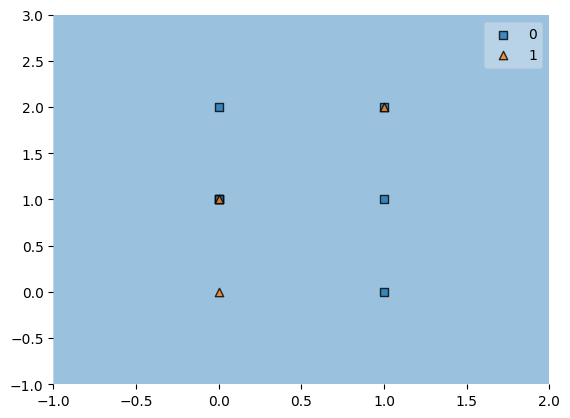

In [117]:
from mlxtend.plotting import plot_decision_regions

# 결정경계 확인
plot_decision_regions(data.to_numpy(), target.to_numpy(), clf = nbclf) 
plt.show()